In [1]:
#install library to check missing values
!pip install missingno

You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
#importing libraries
import pandas as pd
import matplotlib.pylab as plt
import missingno as msno
import seaborn as sns
import time
import re
print('Pandas',pd.__version__)

Pandas 1.3.4


In [3]:
#note the start time of the propram
start_time = time.time()

In [4]:
#read the data file
Car = pd.read_csv('CarPrice_Assignment.csv')
Car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
Car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
#check the number of rows and columns in the dataframe
Car.shape

(205, 26)

In [7]:
#Find number of non-null values and data type of each column in the dataframe
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
counter = 0
for this_column in Car.columns:
    if (Car[this_column].nunique()==1):
        print(this_column)
        counter = 1
if(counter != 1):
    print('There are no such columns having the same value for all the rows.')

There are no such columns having the same value for all the rows.


In [9]:
#function to number of unique values and its count for all columns in a data frame
def uniq_per_col(df1,count):
    for this_column in df1.columns:
        print("==== ",this_column,"has",df1[this_column].nunique(),"unique entries ====")
        print(df1[this_column].value_counts().head(count))

In [10]:
uniq_per_col(Car,5)

====  car_ID has 205 unique entries ====
1      1
142    1
132    1
133    1
134    1
Name: car_ID, dtype: int64
====  symboling has 6 unique entries ====
 0    67
 1    54
 2    32
 3    27
-1    22
Name: symboling, dtype: int64
====  CarName has 147 unique entries ====
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
Name: CarName, dtype: int64
====  fueltype has 2 unique entries ====
gas       185
diesel     20
Name: fueltype, dtype: int64
====  aspiration has 2 unique entries ====
std      168
turbo     37
Name: aspiration, dtype: int64
====  doornumber has 2 unique entries ====
four    115
two      90
Name: doornumber, dtype: int64
====  carbody has 5 unique entries ====
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
====  drivewheel has 3 unique entries ====
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
====  eng

In [11]:
Car.isnull().sum()/len(Car)*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [12]:
#find number of unique values in various object type columns
count = 10
for col,col_type in Car.dtypes.iteritems():
    if(col_type=='object'):
        print('\n',col,'has',Car[col].nunique(),'unique entries; and the top unique values are ')
        print(Car[col].value_counts().head(count))


 CarName has 147 unique entries; and the top unique values are 
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
mazda 626               3
toyota mark ii          3
mitsubishi outlander    3
mitsubishi g4           3
honda civic             3
Name: CarName, dtype: int64

 fueltype has 2 unique entries; and the top unique values are 
gas       185
diesel     20
Name: fueltype, dtype: int64

 aspiration has 2 unique entries; and the top unique values are 
std      168
turbo     37
Name: aspiration, dtype: int64

 doornumber has 2 unique entries; and the top unique values are 
four    115
two      90
Name: doornumber, dtype: int64

 carbody has 5 unique entries; and the top unique values are 
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

 drivewheel has 3 unique entries; and the top unique values are 
fwd    120
rwd     76
4wd      9
Na

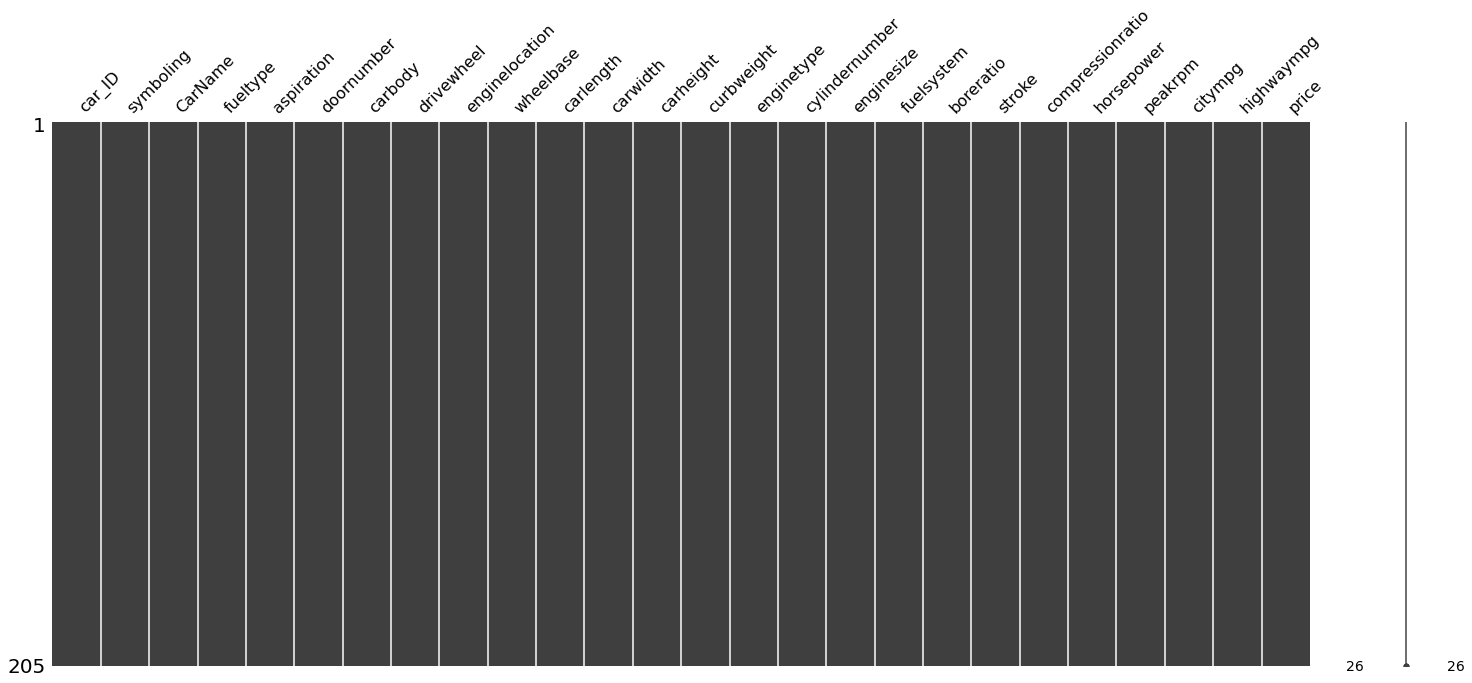

In [13]:
_=msno.matrix(Car.sample(Car.shape[0]))
#Black = filled; white = empty

In [14]:
#read the data file
data = pd.read_csv('USA_cars_datasets.csv')
data.head()

,Unnamed: 0,price,Brand,Model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0.0,6300.0,Toyota,Cruiser,2008.0,clean vehicle,274117.0,black,jtezu11f88k007763,159348797.0,new jersey,usa,10 days left
1,1.0,2899.0,Ford,Se,2011.0,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262.0,tennessee,usa,6 days left
2,2.0,5350.0,Dodge,Mpv,2018.0,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728.0,georgia,usa,2 days left
3,3.0,25000.0,Ford,Door,2014.0,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855.0,virginia,usa,22 hours left
4,4.0,27700.0,Chevrolet,1500,2018.0,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266.0,florida,usa,22 hours left


In [15]:
data

,Unnamed: 0,price,Brand,Model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0.0,6300.0,Toyota,Cruiser,2008.0,clean vehicle,274117.0,black,jtezu11f88k007763,159348797.0,new jersey,usa,10 days left
1,1.0,2899.0,Ford,Se,2011.0,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262.0,tennessee,usa,6 days left
2,2.0,5350.0,Dodge,Mpv,2018.0,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728.0,georgia,usa,2 days left
3,3.0,25000.0,Ford,Door,2014.0,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855.0,virginia,usa,22 hours left
4,4.0,27700.0,Chevrolet,1500,2018.0,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266.0,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2495.0,9200.0,Nissan,Versa,2018.0,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225.0,florida,usa,21 hours left
2496,2496.0,9200.0,Nissan,Versa,2018.0,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226.0,florida,usa,21 hours left
2497,2497.0,9200.0,Nissan,Versa,2018.0,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227.0,florida,usa,2 days left
2498,2498.0,9200.0,Nissan,Versa,2018.0,clean vehicle,31371.0,silver,3n1cn7ap4jl884311,167762228.0,florida,usa,21 hours left


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   float64
 1   price         2499 non-null   float64
 2   Brand         2499 non-null   object 
 3   Model         2499 non-null   object 
 4   year          2499 non-null   float64
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   float64
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(5), object(8)
memory usage: 254.0+ KB


In [17]:
counter = 0
for this_column in data.columns:
    if (data[this_column].nunique()==1):
        print(this_column)
        counter = 1
if(counter != 1):
    print('There are no such columns having the same value for all the rows.')

There are no such columns having the same value for all the rows.


In [18]:
#function to number of unique values and its count for all columns in a data frame
def uniq_per_col(df,count):
    for this_column in df.columns:
        print("==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
        print(df[this_column].value_counts().head(count))

In [19]:
uniq_per_col(data,5)

====  Unnamed: 0 has 2499 unique entries ====
0.0       1
1669.0    1
1662.0    1
1663.0    1
1664.0    1
Name: Unnamed: 0, dtype: int64
====  price has 790 unique entries ====
0.0        43
16500.0    26
13900.0    21
15500.0    19
15000.0    19
Name: price, dtype: int64
====  Brand has 28 unique entries ====
Ford         1235
Dodge         432
Nissan        312
Chevrolet     297
Gmc            42
Name: Brand, dtype: int64
====  Model has 127 unique entries ====
Door       651
F-150      219
Doors      148
Caravan    102
Mpv         87
Name: Model, dtype: int64
====  year has 30 unique entries ====
2019.0    892
2018.0    395
2017.0    377
2016.0    203
2015.0    196
Name: year, dtype: int64
====  title_status has 2 unique entries ====
clean vehicle        2336
salvage insurance     163
Name: title_status, dtype: int64
====  mileage has 2439 unique entries ====
1.0        11
0.0         6
31727.0     2
33808.0     2
21774.0     2
Name: mileage, dtype: int64
====  color has 49 unique e

In [20]:
data.isnull().sum()/len(data)*100

Unnamed: 0      0.04
price           0.04
Brand           0.04
Model           0.04
year            0.04
title_status    0.04
mileage         0.04
color           0.04
vin             0.04
lot             0.04
state           0.04
country         0.04
condition       0.04
dtype: float64

In [21]:
#find number of unique values in various object type columns
count = 10
for col,col_type in data.dtypes.iteritems():
    if(col_type=='object'):
        print('\n',col,'has',data[col].nunique(),'unique entries; and the top unique values are ')
        print(data[col].value_counts().head(count))


 Brand has 28 unique entries; and the top unique values are 
Ford         1235
Dodge         432
Nissan        312
Chevrolet     297
Gmc            42
Jeep           30
Chrysler       18
Bmw            17
Hyundai        15
Kia            13
Name: Brand, dtype: int64

 Model has 127 unique entries; and the top unique values are 
Door       651
F-150      219
Doors      148
Caravan    102
Mpv         87
Fusion      65
Durango     64
Journey     61
Rogue       54
Van         46
Name: Model, dtype: int64

 title_status has 2 unique entries; and the top unique values are 
clean vehicle        2336
salvage insurance     163
Name: title_status, dtype: int64

 color has 49 unique entries; and the top unique values are 
white       707
black       516
gray        395
silver      300
red         192
blue        151
no_color     61
green        24
orange       20
gold         19
Name: color, dtype: int64

 vin has 2495 unique entries; and the top unique values are 
  1gnevhkw8jj148388    2
  1gn

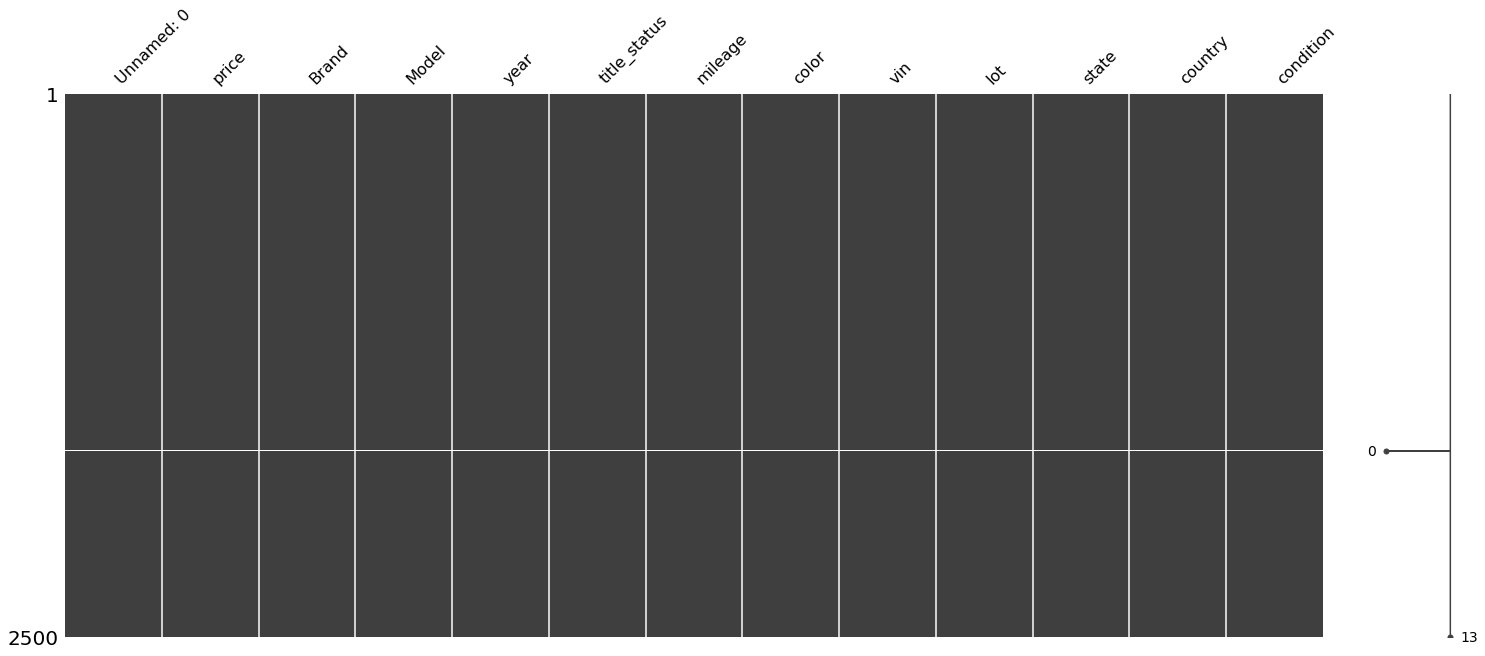

In [22]:
_=msno.matrix(data.sample(data.shape[0]))
#Black = filled; white = empty

In [23]:
Car['CarName'] = Car.CarName.str.split(' ',1).tolist()

In [24]:
Car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,"[alfa-romero, giulia]",gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,"[alfa-romero, stelvio]",gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,"[alfa-romero, Quadrifoglio]",gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,"[audi, 100 ls]",gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,"[audi, 100ls]",gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,"[volvo, 145e (sw)]",gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,"[volvo, 144ea]",gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,"[volvo, 244dl]",gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,"[volvo, 246]",diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [25]:
Car['Brand'] = Car['CarName'].str[0]
Car['Model'] = Car['CarName'].str[1]
Car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,Model
0,1,3,"[alfa-romero, giulia]",gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,"[alfa-romero, stelvio]",gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,"[alfa-romero, Quadrifoglio]",gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,"[audi, 100 ls]",gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,"[audi, 100ls]",gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,"[volvo, 145e (sw)]",gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,202,-1,"[volvo, 144ea]",gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,203,-1,"[volvo, 244dl]",gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,204,-1,"[volvo, 246]",diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


In [26]:
#Car.rename(columns={"fuel-type":"fueltype"})

In [45]:
pd.concat([Car, data], axis=0)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,Unnamed: 0,year,title_status,mileage,color,vin,lot,state,country,condition
0,1.0,3.0,"[alfa-romero, giulia]",gas,std,two,convertible,rwd,front,88.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,3.0,"[alfa-romero, stelvio]",gas,std,two,convertible,rwd,front,88.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,1.0,"[alfa-romero, Quadrifoglio]",gas,std,two,hatchback,rwd,front,94.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2.0,"[audi, 100 ls]",gas,std,four,sedan,fwd,front,99.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2.0,"[audi, 100ls]",gas,std,four,sedan,4wd,front,99.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2495.0,2018.0,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225.0,florida,usa,21 hours left
2496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2496.0,2018.0,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226.0,florida,usa,21 hours left
2497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2497.0,2018.0,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227.0,florida,usa,2 days left
2498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2498.0,2018.0,clean vehicle,31371.0,silver,3n1cn7ap4jl884311,167762228.0,florida,usa,21 hours left


In [32]:
Car2 = Car[['Brand','Model','fueltype', 'aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']].copy()

In [35]:
Car2.head()

,Brand,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,3.47,9.0,154,5000,19,26,16500.0
3,audi,100 ls,gas,std,four,sedan,fwd,front,99.8,3.40,10.0,102,5500,24,30,13950.0
4,audi,100ls,gas,std,four,sedan,4wd,front,99.4,3.40,8.0,115,5500,18,22,17450.0


In [42]:
mergefile = pd.merge(Car2, data,how ='left', on= ['Brand','Model'])

In [52]:
mergefile1 = pd.merge(Car2, data,how ='inner', on= ['Brand'])

In [43]:
mergefile

,Brand,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,stroke,...,price_y,year,title_status,mileage,color,vin,lot,state,country,condition
0,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,2.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,2.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,3.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,audi,100 ls,gas,std,four,sedan,fwd,front,99.8,3.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,audi,100ls,gas,std,four,sedan,4wd,front,99.4,3.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,145e (sw),gas,std,four,sedan,rwd,front,109.1,3.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,volvo,144ea,gas,turbo,four,sedan,rwd,front,109.1,3.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,volvo,244dl,gas,std,four,sedan,rwd,front,109.1,2.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,volvo,246,diesel,turbo,four,sedan,rwd,front,109.1,3.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
mergefile1

,Brand,Model_x,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,stroke,...,Model_y,year,title_status,mileage,color,vin,lot,state,country,condition
0,Nissan,versa,gas,std,two,sedan,fwd,front,94.5,3.29,...,Doors,2018.0,clean vehicle,36739.0,gray,3n1cn7ap5jl872135,167692446.0,california,usa,20 hours left
1,Nissan,versa,gas,std,two,sedan,fwd,front,94.5,3.29,...,Mpv,2017.0,clean vehicle,42616.0,blue,5n1at2mv4hc773816,167668377.0,new jersey,usa,17 hours left
2,Nissan,versa,gas,std,two,sedan,fwd,front,94.5,3.29,...,Doors,2018.0,clean vehicle,29043.0,blue,3n1ab7ap2jy244200,167692447.0,california,usa,20 hours left
3,Nissan,versa,gas,std,two,sedan,fwd,front,94.5,3.29,...,Doors,2017.0,clean vehicle,36064.0,gray,3n1ab7ap5hy411143,167668543.0,new jersey,usa,17 hours left
4,Nissan,versa,gas,std,two,sedan,fwd,front,94.5,3.29,...,Doors,2017.0,clean vehicle,34861.0,gray,3n1ab7ap0hy315498,167668544.0,new jersey,usa,17 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Nissan,versa,gas,std,two,sedan,fwd,front,94.5,3.29,...,Versa,2019.0,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715.0,california,usa,1 days left
308,Nissan,versa,gas,std,two,sedan,fwd,front,94.5,3.29,...,Versa,2018.0,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225.0,florida,usa,21 hours left
309,Nissan,versa,gas,std,two,sedan,fwd,front,94.5,3.29,...,Versa,2018.0,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226.0,florida,usa,21 hours left
310,Nissan,versa,gas,std,two,sedan,fwd,front,94.5,3.29,...,Versa,2018.0,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227.0,florida,usa,2 days left


In [34]:
#Car.merge(Price, left_on='make', right_on='fueltype')

In [ ]:
#Car

In [ ]:
#Car2.merge(Price, left_on='make')

In [ ]:
#Car2 = Car.reindex(columns=['make', 'fueltype'])

In [ ]:
#Car2.head()

In [ ]:
#Car2 = Car[['make','fueltype']].copy()